In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import bidi.algorithm
import arabic_reshaper
import adhtools.utils

In [2]:
fpath = '/media/sf_VBox_Shared/Arabic/Analyses/Fiqh_final/topicmodelling/'

In [3]:
document_topics = pd.read_csv(os.path.join(fpath, 'fiqh_light10_document_topics_20.csv'), index_col=0).sort_index()
df_topics = pd.read_csv(os.path.join(fpath, 'fiqh_light10_topics_20.csv'), index_col=0)
metadata = pd.read_csv(os.path.join(fpath, 'metadata-chapters.csv'), index_col=0)

In [4]:
#metadata = metadata.set_index('filename')

In [5]:
topic_names = df_topics['0'] +' '+ df_topics['1'] +' '+ df_topics['3']

In [6]:
# import glob
# book_files = glob.glob('/media/sf_VBox_Shared/Arabic/Fiqh/2018-11-13-Fiqh-stemmed-chapters/*.xml')
# c = adhtools.utils.corpus_wordlist(book_files, analyzer=False, field='proposed_root')
# chapter_lengths = {os.path.basename(b): len(l) for (b,l) in zip (book_files, c)}
# metadata['ChapterLength'] = pd.Series(chapter_lengths)

In [7]:
def split_fname(fname):
    splitted = fname.split('-')
    bookname = splitted[0]
    if len(splitted)>1:
        chapter = int(splitted[-1].split('.')[0])
    else:
        chapter = 0
    return (bookname, chapter)

In [8]:
document_topics.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0179MalikIbnAnas.Muwatta-00000.xml,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.220000,0.020000,0.020000,0.020000,0.220000,0.220000,0.020000,0.020000
0179MalikIbnAnas.Muwatta-00001.xml,0.000258,0.000258,0.000258,0.000258,0.000258,0.015762,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.633333,0.000258,0.000258,0.000258,0.000258,0.346512,0.000258,0.000258
0179MalikIbnAnas.Muwatta-00002.xml,0.001818,0.001818,0.001818,0.001818,0.001818,0.001818,0.001818,0.001818,0.020000,0.001818,0.001818,0.001818,0.765455,0.001818,0.001818,0.001818,0.038182,0.147273,0.001818,0.001818
0179MalikIbnAnas.Muwatta-00003.xml,0.001724,0.001724,0.001724,0.018966,0.001724,0.001724,0.001724,0.001724,0.001724,0.018966,0.001724,0.001724,0.536207,0.001724,0.001724,0.001724,0.001724,0.398276,0.001724,0.001724
0179MalikIbnAnas.Muwatta-00004.xml,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.531293,0.000680,0.000680,0.000680,0.000680,0.456463,0.000680,0.000680


In [9]:
metadata['filename'] = metadata.filename.astype(str)

In [10]:
metadata_newind = metadata
metadata_newind.index = pd.MultiIndex.from_tuples(metadata.filename.map(split_fname))

In [41]:
ind = metadata_newind.index
book_names = sorted(ind.levels[0])

In [13]:
metadata_newind.head()

All_tokens_per-century    AuthorAKA AuthorBORNC  \
0179MalikIbnAnas.Muwatta 0                     NaN  مالك بن أنس         711   
                         1                     NaN  مالك بن أنس         711   
                         2                     NaN  مالك بن أنس         711   
                         3                     NaN  مالك بن أنس         711   
                         4                     NaN  مالك بن أنس         711   

                           AuthorBORNH AuthorDIEDC  AuthorDIEDH  \
0179MalikIbnAnas.Muwatta 0          93         795        179.0   
                         1          93         795        179.0   
                         2          93         795        179.0   
                         3          93         795        179.0   
                         4          93         795        179.0   

                                                            AuthorNAME  \
0179MalikIbnAnas.Muwatta 0  مالك بن أنس بن مالك بن عامر الأصبحي المدني   
                         1  مالك بن أنس بن مالك بن عامر الأصبحي المدني   
                         2  مالك بن أنس بن مالك بن عامر الأصبحي المدني   
                         3  مالك بن أنس بن مالك بن عامر الأصبحي المدني   
                         4  مالك بن أنس بن مالك بن عامر الأصبحي المدني   

                           Author_Geographical_Area BookSUBJ  \
0179MalikIbnAnas.Muwatta 0         Fertile Crescent    مالكي   
                         1         Fertile Crescent    مالكي   
                         2         Fertile Crescent    مالكي   
                         3         Fertile Crescent    مالكي   
                         4         Fertile Crescent    مالكي   

                                                        BookSource  \
0179MalikIbnAnas.Muwatta 0  http://shamela.ws/index.php/book/28107   
                         1  http://shamela.ws/index.php/book/28107   
                         2  http://shamela.ws/index.php/book/28107   
                         3  http://shamela.ws/index.php/book/28107   
                         4  http://shamela.ws/index.php/book/28107   

                                           ...                  \
0179MalikIbnAnas.Muwatta 0                 ...                   
                         1                 ...                   
                         2                 ...                   
                         3                 ...                   
                         4                 ...                   

                           BookTITLE_SHORT                   BookURI BookVOLS  \
0179MalikIbnAnas.Muwatta 0          الموطأ  0179MalikIbnAnas.Muwatta        1   
                         1          الموطأ  0179MalikIbnAnas.Muwatta        1   
                         2          الموطأ  0179MalikIbnAnas.Muwatta        1   
                         3          الموطأ  0179MalikIbnAnas.Muwatta        1   
                         4          الموطأ  0179MalikIbnAnas.Muwatta        1   

                                                    Century ChapterLength  \
0179MalikIbnAnas.Muwatta 0  2ndH/8thC and 3rdH/9thC century             3   
                         1  2ndH/8thC and 3rdH/9thC century           662   
                         2  2ndH/8thC and 3rdH/9thC century            84   
                         3  2ndH/8thC and 3rdH/9thC century           105   
                         4  2ndH/8thC and 3rdH/9thC century           261   

                                 Level1Title  \
0179MalikIbnAnas.Muwatta 0  كتاب وقوت الصلاة   
                         1  كتاب وقوت الصلاة   
                         2  كتاب وقوت الصلاة   
                         3  كتاب وقوت الصلاة   
                         4  كتاب وقوت الصلاة   

                                                                  Level2Title  \
0179MalikIbnAnas.Muwatta 0                                                  -   
                         1                                    باب وقوت الصلاة   
                    

In [40]:
largest_topics = pd.DataFrame(document_topics.idxmax(axis=1))#, index=metadata_newind.index)
largest_topics.index = metadata_newind.index

largest_topics = pd.concat((largest_topics,  metadata_newind['ChapterLength'], metadata_newind['Number_of_tokens']), axis=1)

#largest_topics.index = new_ind
largest_topics = largest_topics.reset_index()
largest_topics.columns = ['book', 'chapter', 'topic', 'length', 'total_length']

In [42]:
book_dict = {b: i for i,b in enumerate(book_names)}

In [43]:
metadata_newind['topic'] = largest_topics.set_index(['book', 'chapter'])['topic']
metadata_newind['topic_name'] = [topic_names[int(topic)] for topic in metadata_newind['topic']]

In [44]:
metadata_newind.to_csv(os.path.join(fpath, 'chapters_metadata_topics.csv'))

In [45]:
largest_topics['x1'] = largest_topics.groupby('book')['length'].transform(pd.Series.cumsum)
largest_topics['x0'] = largest_topics['x1'] - largest_topics['length']

In [46]:
largest_topics['total_length'] = largest_topics.groupby('book')['x1'].transform(lambda l: [l.max()]*len(l))

In [47]:
largest_topics['perc0'] = largest_topics['x0'] / largest_topics['total_length']
largest_topics['perc1'] = largest_topics['x1'] / largest_topics['total_length']

In [48]:
largest_topics[650:660]

,book,chapter,topic,length,total_length,x1,x0,perc0,perc1
650,0179MalikIbnAnas.Muwatta,650,12,104,146007,144172,144068,0.986720,0.987432
651,0179MalikIbnAnas.Muwatta,651,12,183,146007,144355,144172,0.987432,0.988685
652,0179MalikIbnAnas.Muwatta,652,12,92,146007,144447,144355,0.988685,0.989316
653,0179MalikIbnAnas.Muwatta,653,12,72,146007,144519,144447,0.989316,0.989809
654,0179MalikIbnAnas.Muwatta,654,12,78,146007,144597,144519,0.989809,0.990343
655,0179MalikIbnAnas.Muwatta,655,12,38,146007,144635,144597,0.990343,0.990603
656,0179MalikIbnAnas.Muwatta,656,12,106,146007,144741,144635,0.990603,0.991329
657,0179MalikIbnAnas.Muwatta,657,12,77,146007,144818,144741,0.991329,0.991857
658,0179MalikIbnAnas.Muwatta,658,12,359,146007,145177,144818,0.991857,0.994315
659,0179MalikIbnAnas.Muwatta,659,12,430,146007,145607,145177,0.994315,0.997260


In [51]:
color_list = sns.color_palette("muted", n_colors=10) + sns.color_palette("dark", n_colors=10)

In [52]:
import matplotlib.colors

def style_row(row):
    topic_id = int(row.name)
    color = matplotlib.colors.to_hex(color_list[topic_id])
    attr = 'background-color: {}'.format(color)
    return [attr for v in  row]
df_topics.style.apply(style_row, axis=1)

,0,1,2,3,4,5,6,7,8,9
0,عقد,فل,عد,ولد,اذ,مهر,ام,نكاح,ول,زوج
1,اخذ,اذ,وقف,خمس,عشر,حول,صدق,ول,مال,زكا
2,سجد,سلام,ركع,وقت,اول,صل,ول,اذ,امام,صلا
3,امام,فل,اهل,قطع,اسلام,اذ,قتل,حد,مسلم,ول
4,خيار,مال,بااع,عقد,ول,قبض,اذ,ثمن,مشتر,بيع
5,ول,ظاهر,عدم,هذ,بخلاف,ام,اذ,فل,ذكر,اول
6,طهار,مسح,حيض,دم,نجاس,اذ,صلا,وض,ول,غسل
7,شافع,ابو,رجل,نب,حديث,مالك,عمر,رسول,اب,صل
8,ذكر,صحيح,اب,ظاهر,اول,اخبار,شيخ,روا,هذ,سلام
9,فل,يوسف,اصل,تعال,رحم,حنيف,حق,اب,اذ,هذ


In [53]:
def plot_bar_per_book(largest_topics, xmin_col, xmax_col, book_names, topic_names, legend=True):
    book_dict = {b: i for i,b in enumerate(book_names)}

    plt.figure(figsize=(25, np.floor(len(book_names)*0.5)))
    ax = plt.gca()
    for topic in range(len(topic_names)):
        topic_name = topic_names[topic]
        largest_topics_sub = largest_topics[largest_topics['topic']==str(topic)]
        color = color_list[topic] 


        y = [book_dict[s] for s in largest_topics_sub['book']]
        #x = largest_topics_sub['chapter']
        xmin = largest_topics_sub[xmin_col]
        xmax = largest_topics_sub[xmax_col]
        ax.hlines(y, xmin, xmax, #marker='s', edgecolors=None, 
                  colors=np.array((color,)), lw=10,
                   label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_name)))
    ax.set_yticks(np.arange(len(book_dict)))
    ax.set_yticklabels(book_names)
    ax.set_xlim(0, largest_topics[xmax_col].max())
    ax.set_ylim(-0.5, len(book_names))
    if legend:
        plt.legend(fontsize='large')
    ax.invert_yaxis()
    plt.show()

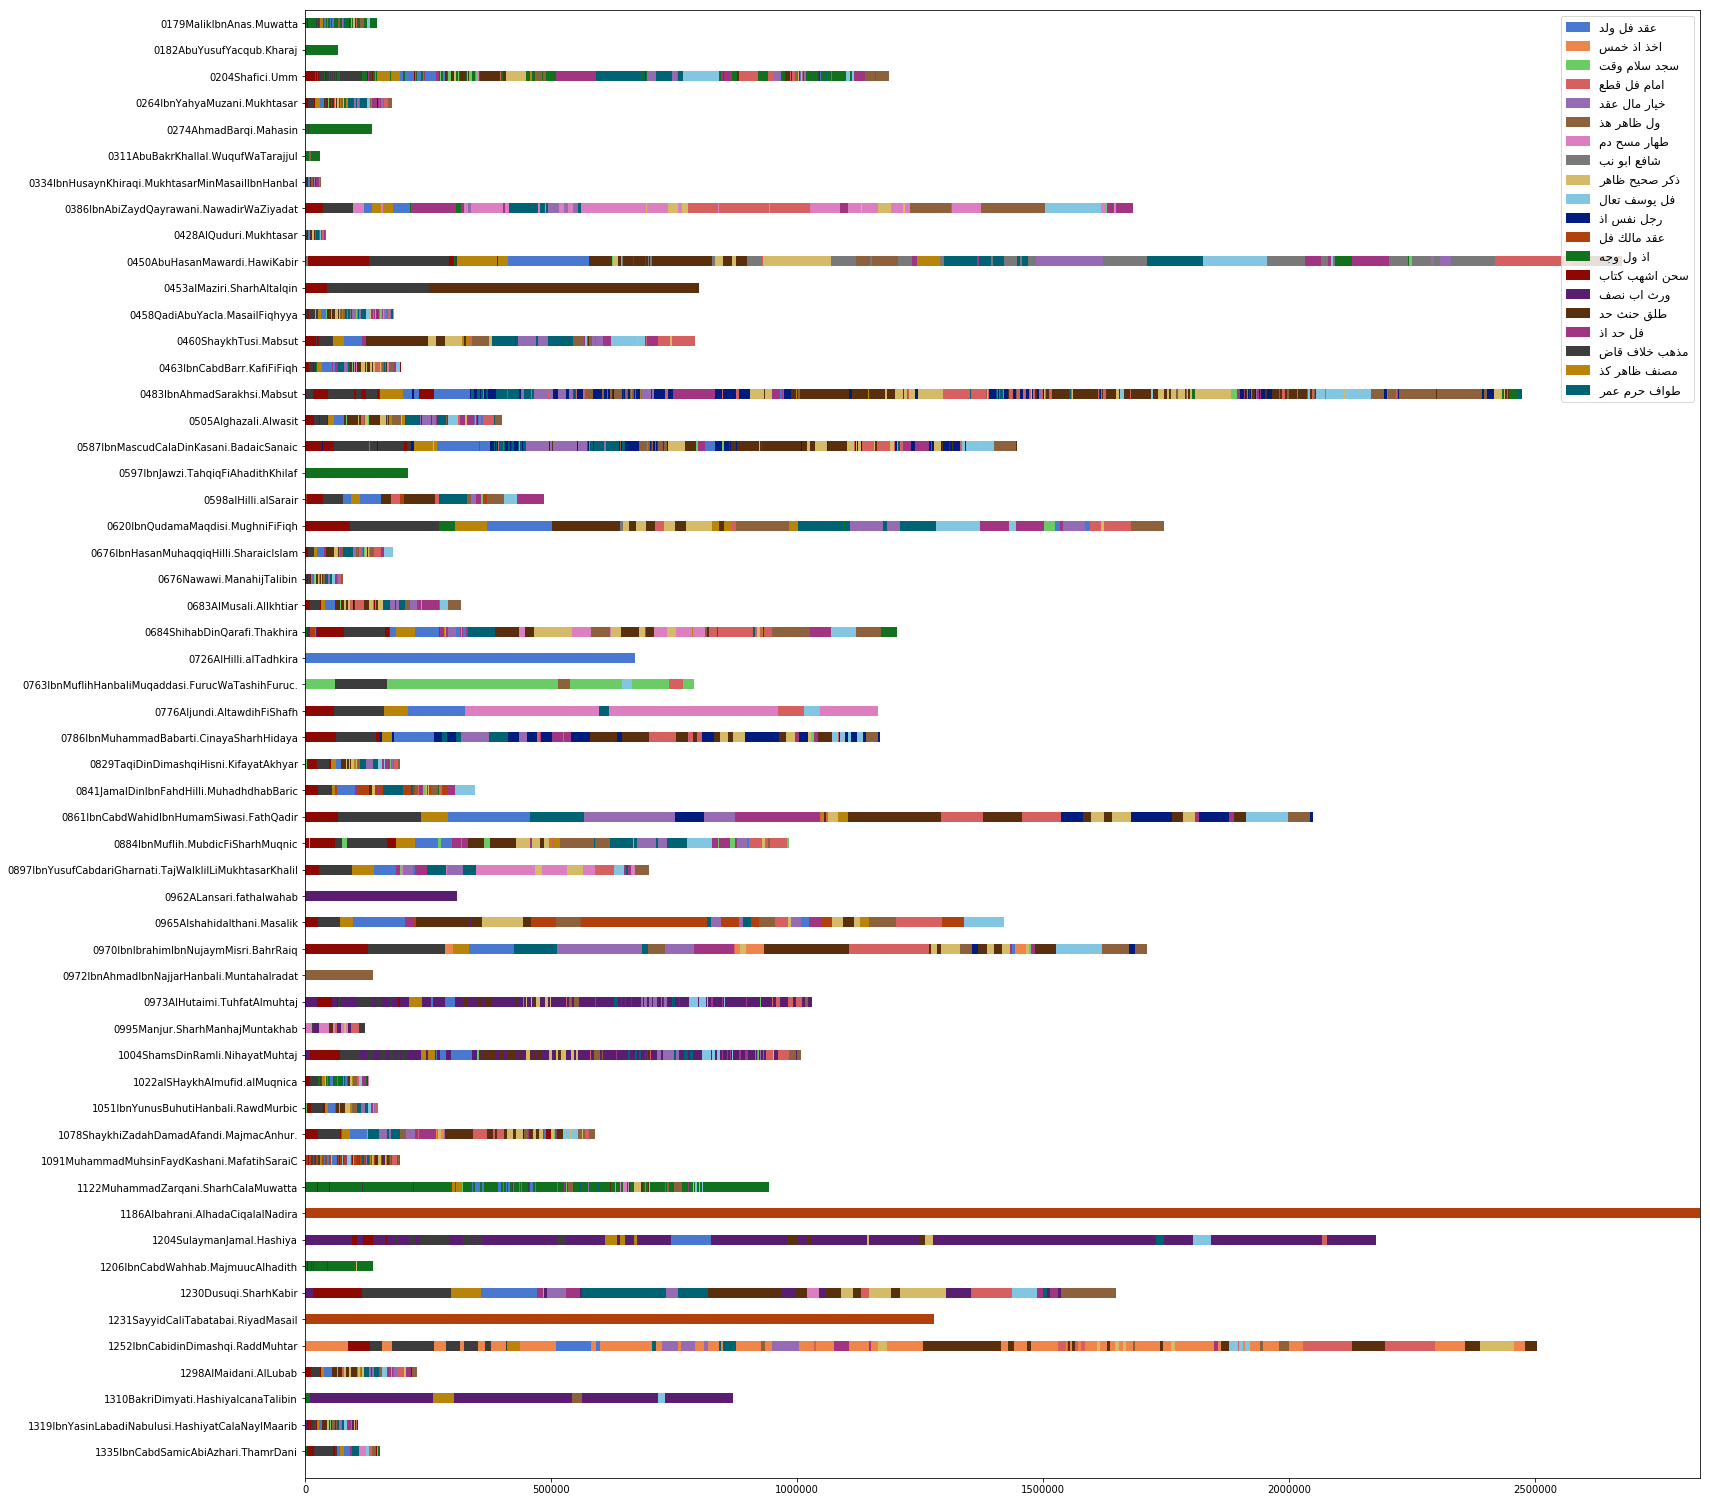

In [54]:
plot_bar_per_book(largest_topics, 'x0', 'x1', book_names, topic_names, legend=True)

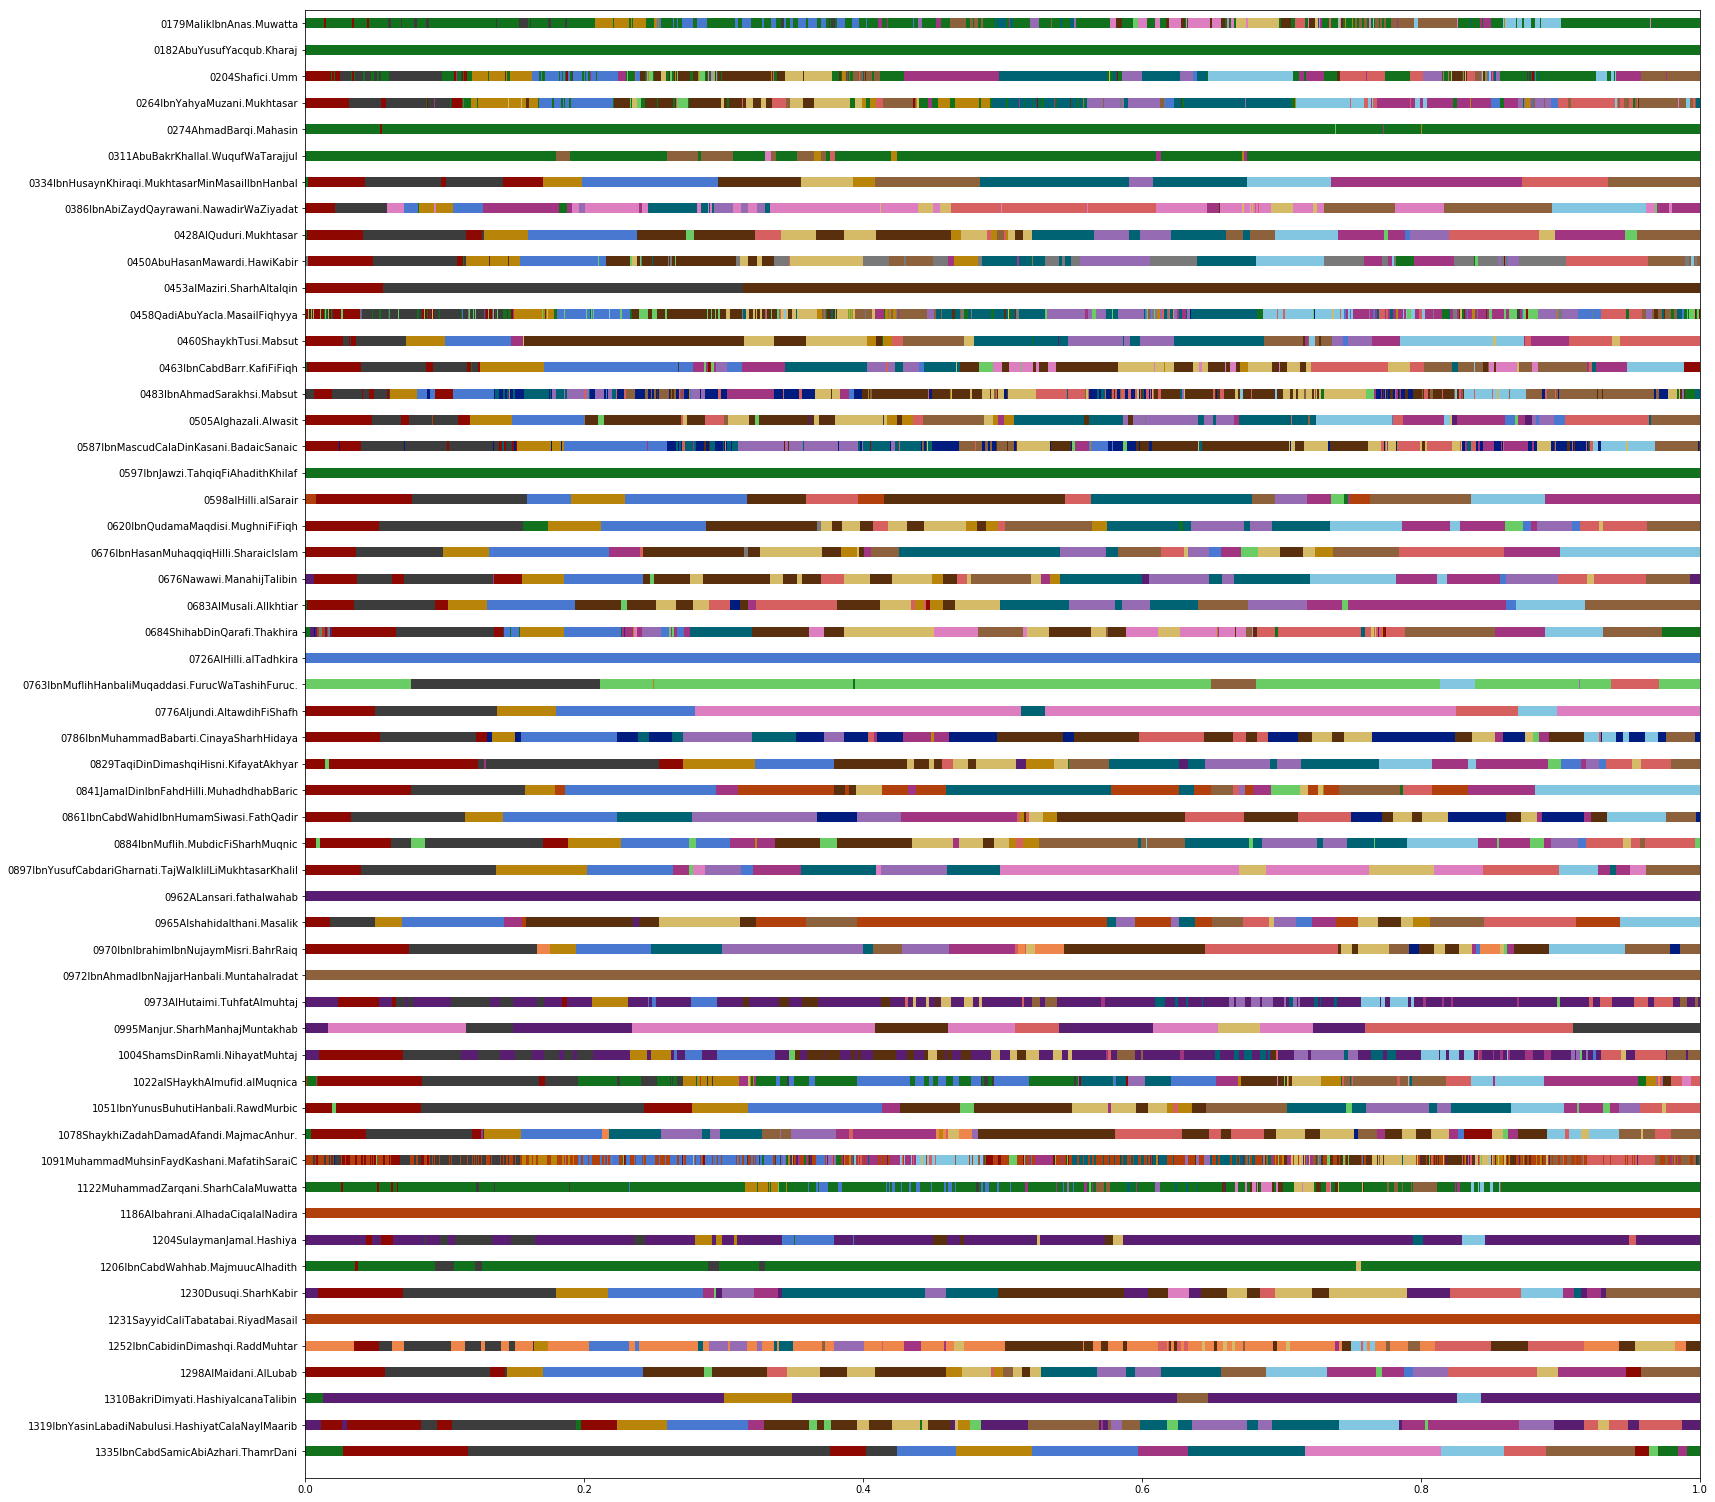

In [55]:
plot_bar_per_book(largest_topics, 'perc0', 'perc1', book_names, topic_names, legend=False)

مالكي


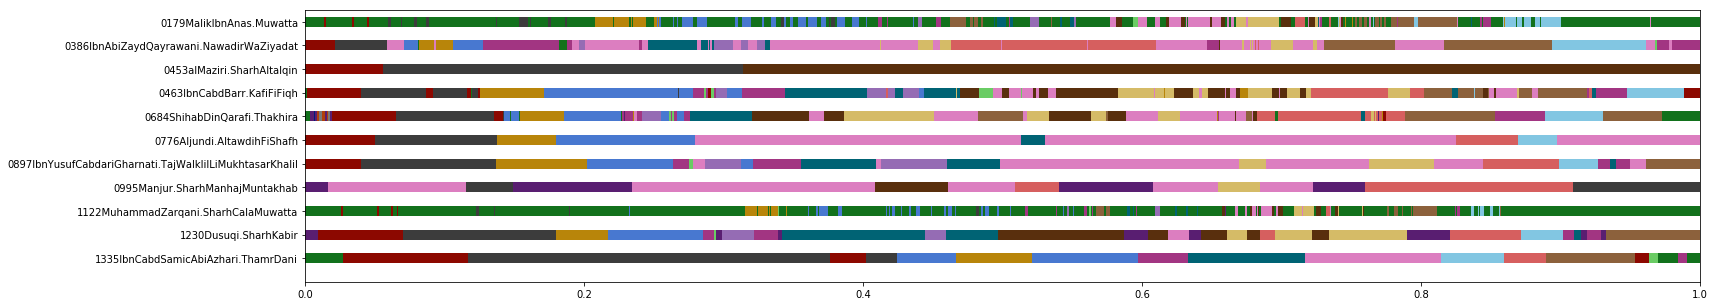

حنفي


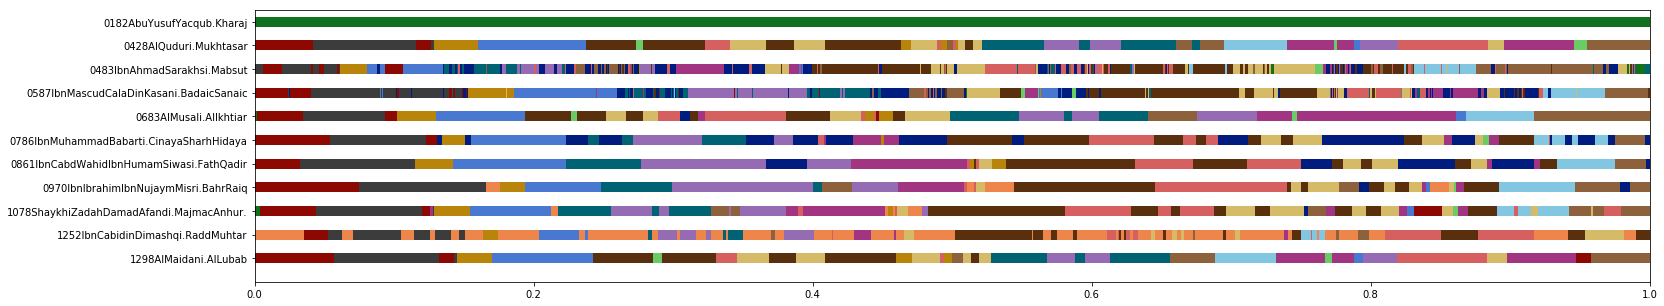

شافعي


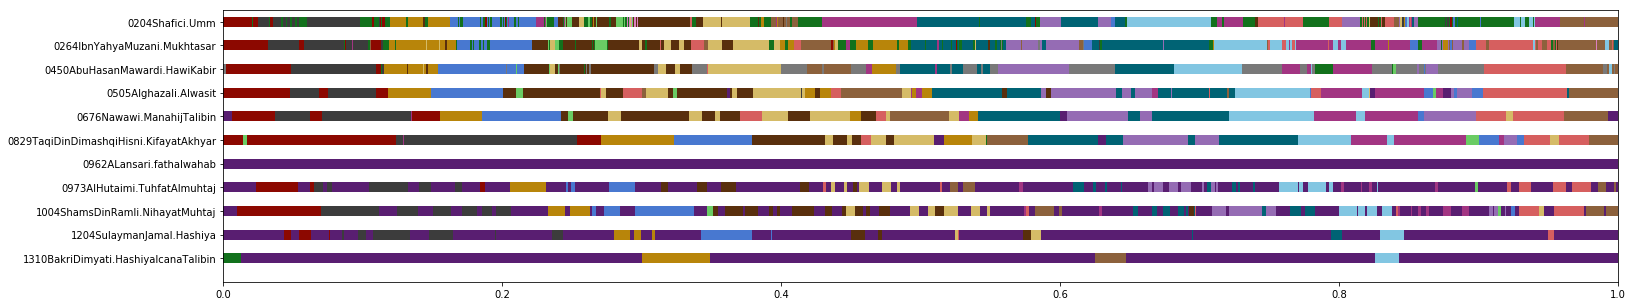

شيعي


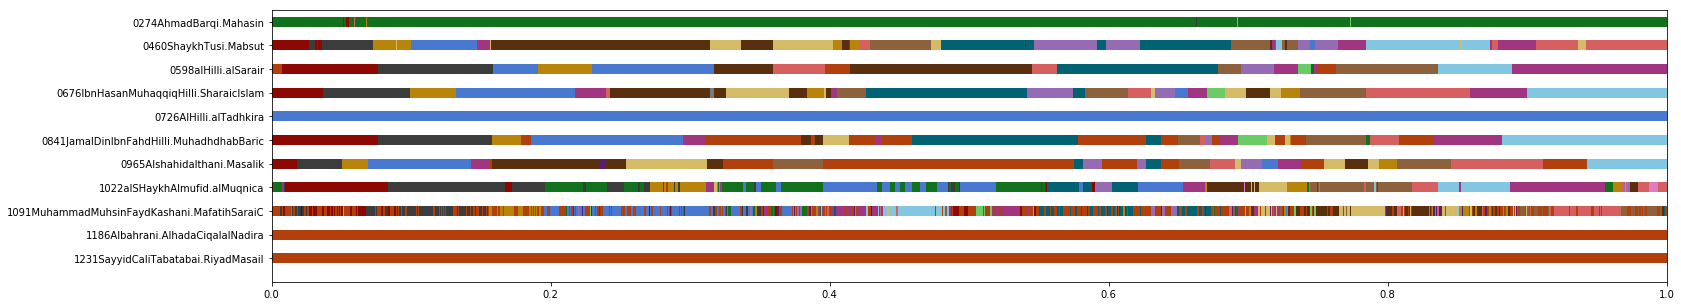

حنبلي


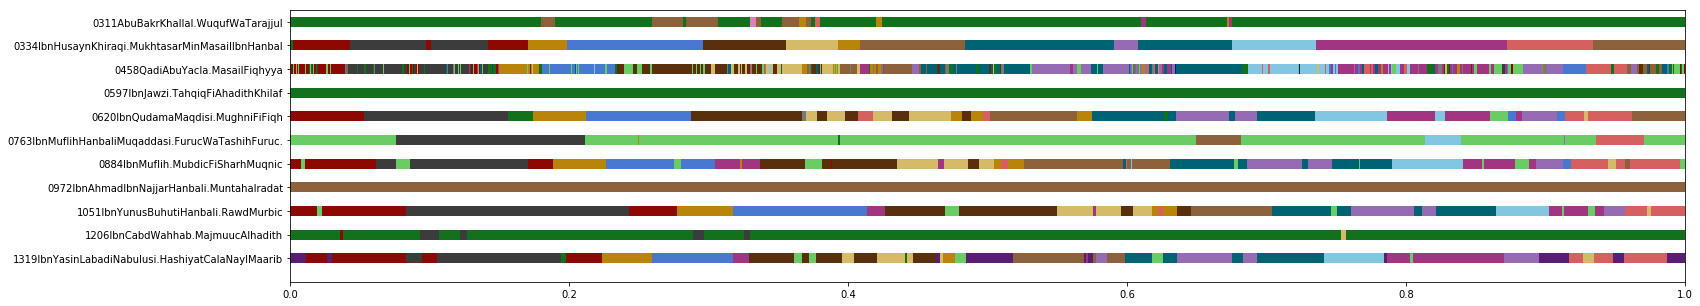

In [56]:
for subj in metadata.BookSUBJ.unique():
    if type(subj)==str:
        print(subj)
        ind_sub = metadata_newind[metadata_newind.BookSUBJ==subj].index.to_frame()
        ind_sub.columns = ['book', 'chapter']
        largest_topics_sub = largest_topics.merge(ind_sub, how='inner')
        plot_bar_per_book(largest_topics_sub, 'perc0', 'perc1', largest_topics_sub.book.unique(), topic_names, legend=False)

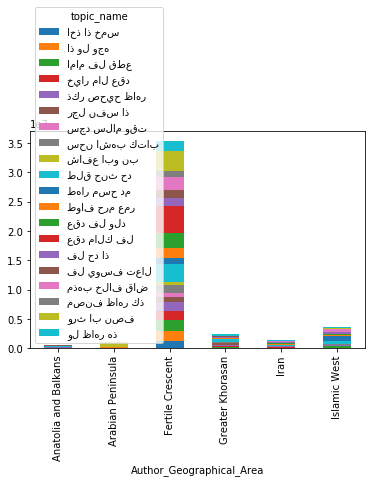

In [57]:
metadata_newind.groupby(['Author_Geographical_Area', 'topic_name'])['ChapterLength'].sum().unstack().plot(kind='bar', stacked=True)

In [58]:
def plot_bars_per_topic(df, topic_names, col1, col2='ChapterLength', aggfunc=sum, reshape_col1=False):
    plt.figure(figsize=(15,10))
    ax = plt.gca()
    values = df.groupby([col1, 'topic'])[col2].apply(aggfunc).sort_values()
    values = values.unstack().fillna(0)
    sorted_index = values.sum(axis=1).sort_values(ascending=False).index
    values = values.loc[sorted_index,:]
    ind0 = values.index
    ind1 = values.columns
    x = np.arange(len(ind0))
    last_y = np.repeat(0, len(ind0))
    for t in ind1:
        y = values[t]
        ax.bar(x, y, bottom=last_y, color=color_list[int(t)],
                label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_names[int(t)])))
        last_y = last_y+y
    if reshape_col1:
        xlabels = [bidi.algorithm.get_display(arabic_reshaper.reshape(l)) for l in ind0]
    else:
        xlabels = ind0
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=90)
    plt.legend()
    plt.show()

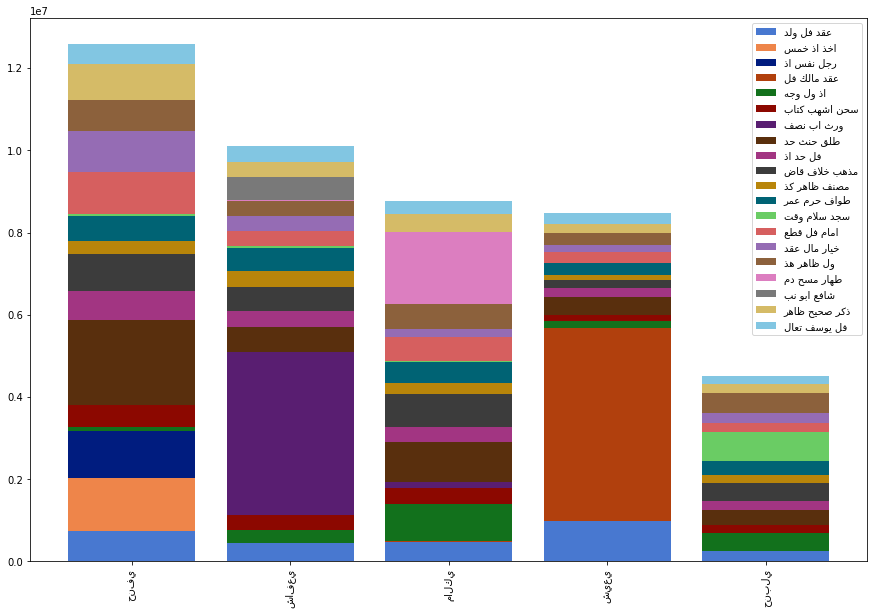

In [59]:
# Here we see the total number of tokens per topic
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ')

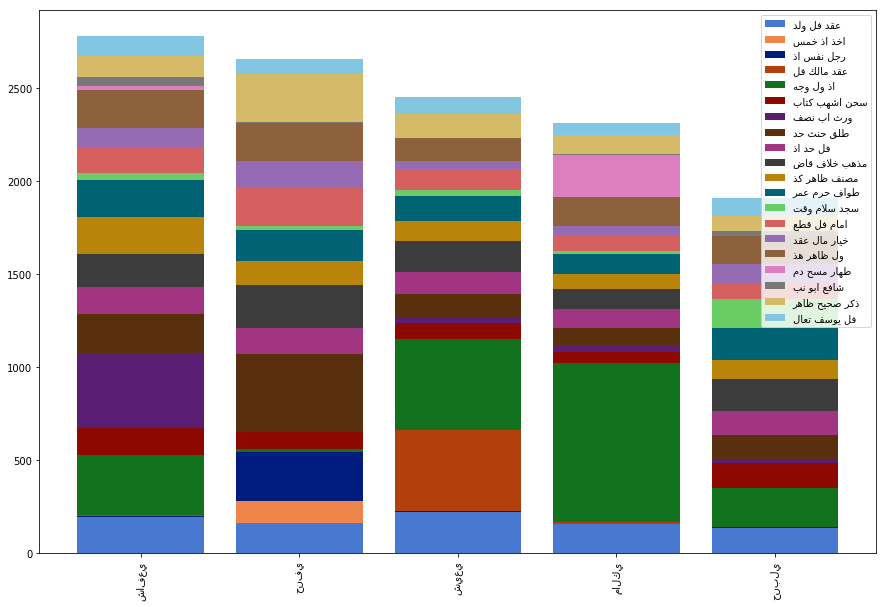

In [60]:
# Here we see only the number of chapters
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ', aggfunc=len)

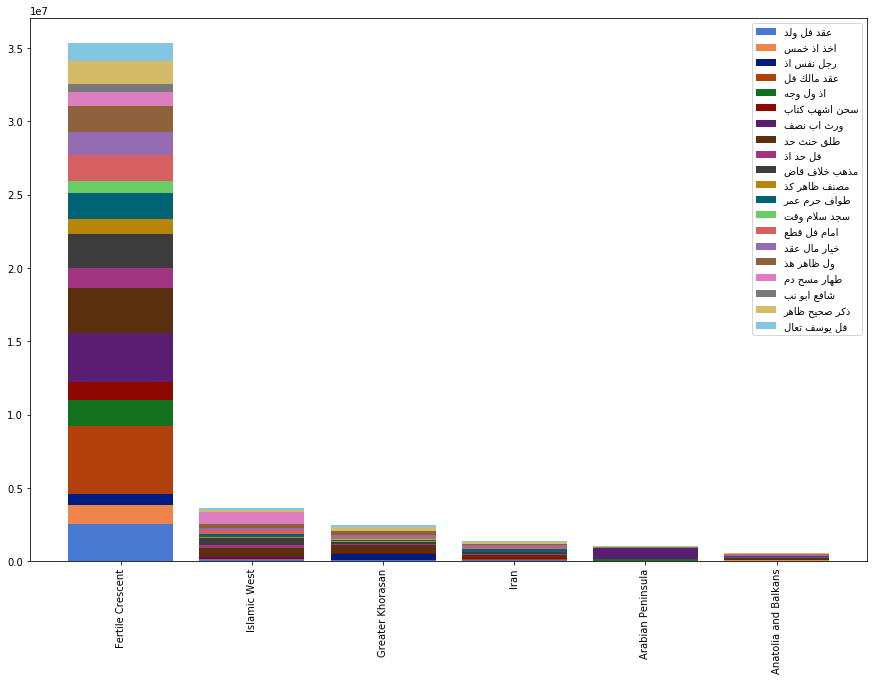

In [61]:
plot_bars_per_topic(metadata_newind, topic_names, 'Author_Geographical_Area')

In [62]:
df_topics.style.apply(style_row, axis=1)

,0,1,2,3,4,5,6,7,8,9
0,عقد,فل,عد,ولد,اذ,مهر,ام,نكاح,ول,زوج
1,اخذ,اذ,وقف,خمس,عشر,حول,صدق,ول,مال,زكا
2,سجد,سلام,ركع,وقت,اول,صل,ول,اذ,امام,صلا
3,امام,فل,اهل,قطع,اسلام,اذ,قتل,حد,مسلم,ول
4,خيار,مال,بااع,عقد,ول,قبض,اذ,ثمن,مشتر,بيع
5,ول,ظاهر,عدم,هذ,بخلاف,ام,اذ,فل,ذكر,اول
6,طهار,مسح,حيض,دم,نجاس,اذ,صلا,وض,ول,غسل
7,شافع,ابو,رجل,نب,حديث,مالك,عمر,رسول,اب,صل
8,ذكر,صحيح,اب,ظاهر,اول,اخبار,شيخ,روا,هذ,سلام
9,فل,يوسف,اصل,تعال,رحم,حنيف,حق,اب,اذ,هذ


In [64]:
# Print volume and chapter names per topic
for topic in range(len(topic_names)):
    meta_sub = metadata_newind[metadata_newind['topic']==str(topic)]
    print(topic)
    print("Volumes:")
    display(meta_sub.Level1Title.value_counts().head(10).index)
    print("Chapters:")
    display(meta_sub.Level2Title.value_counts().head(10).index)
    print('\n')

0
Volumes:


Index(['كتاب الحج', 'كتاب مفاتيح الحج', '-',
       'كتاب الحج باب فرض الحج على من وجب عليه الحج', 'كتاب المناسك',
       'كتاب الحج من أحرم بالحج عن غيره وهو لم يحج عن نفسه مسألة اختلف أصحابنا رحمة الله عليهم',
       'كتاب باب إغماض الميت',
       'كتاب الزكاة فصل في حقيقة الزكاة وما يحب فيها وبيان شروطها',
       'كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت',
       'كتاب الصيام'],
      dtype='object')

Chapters:


Index(['-', 'باب الاعتكاف', 'باب الإحصار', 'مسألة', 'باب صوم التطوع', 'باب',
       'باب الهدي', 'باب المواقيت', 'باب الإحرام', 'باب القران'],
      dtype='object')



1
Volumes:


Index(['كتاب الطلاق', 'كتاب النكاح', 'كتاب الصلاة', 'كتاب الإقرار',
       'كتاب العتق', 'كتاب الحدود', 'كتاب الزكاة', 'كتاب الوصايا',
       'كتاب الوقف', 'كتاب القضاء'],
      dtype='object')

Chapters:


Index(['باب البغاة', '-', 'باب موت المكاتب وعجزه وموت المولى', 'باب ما يبطلها',
       'باب الاستبراء وغيره', 'باب المضارب يضارب', 'باب إقرار المريض',
       'باب القسامة', 'باب النفقة', 'باب فسخ الإجارة'],
      dtype='object')



2
Volumes:


Index(['كتاب الطهارة مسائل في أحكام المياه الوضوء بالماء المتغير',
       'كتاب البيوع',
       'كتاب البيوع وما يتعلق به من العقود بيع من غير رؤية المبيع ولا وصفه مسألة واختلفت الرواية عن',
       'كتاب السير', 'كتاب مفاتيح المطاعم المشارب', 'كتاب الأشربة', '-',
       'كتاب الأطعمة', 'كتاب البيع',
       'كتاب الزكاة مسائل في حكم مانع الزكاة من امتنع عن إخراج الزكاة بخلا وقاتل عليها مسألة واختلفت'],
      dtype='object')

Chapters:


Index(['-', 'مسألة', 'باب الربا', 'باب الآنية', 'باب الذكاة', 'باب حد القذف',
       'باب الربا والصرف', 'باب بيع اللحم باللحم', 'باب حد المسكر',
       'باب حكم المرتد'],
      dtype='object')



3
Volumes:


Index(['كتاب الشهادات', 'كتاب الدعوى', 'كتاب مفاتيح القضاء الشهادات',
       'كتاب باب إغماض الميت', 'كتاب القضاء', 'كتاب الإقرار',
       'كتاب القاضي إلى القاضي', '-', 'كتاب الأقضية',
       'كتاب الأيمان والنذور والكفارات'],
      dtype='object')

Chapters:


Index(['-', 'باب الرجوع عن الشهادة', 'باب حد القذف', 'باب الصرف', 'باب',
       'باب الشهادة على الشهادة', 'باب كتاب القاضي إلى القاضي',
       'باب دعوى النسب', 'باب دعوى الرجلين', 'باب أدب القاضي'],
      dtype='object')



4
Volumes:


Index(['كتاب الطلاق', 'كتاب الأيمان',
       'كتاب النكاح وفيما يتعلق به من المهر والخلع والطلاق والرجعة والإيلاء والظهار والرضاع والعدة',
       'كتاب باب إغماض الميت', '-', 'كتاب الأيمان والنذور والكفارات',
       'كتاب الظهار', 'كتاب الطلاق باب حكم الطلاق وسنته',
       'كتاب الخلع سمى الله تعالى الخلع في كتابه افتداء فقال فلا جناح',
       'كتاب الإيلاء'],
      dtype='object')

Chapters:


Index(['-', 'باب الخلع', 'باب الشك في الطلاق', 'باب الإيلاء', 'باب الظهار',
       'باب', 'باب السلم', 'باب الرجعة', 'مسألة', 'بابجامع لمسائل مختلفة في'],
      dtype='object')



5
Volumes:


Index(['كتاب الفرائض', 'كتاب الوصايا', '-', 'كتاب باب إغماض الميت',
       'كتاب العتق', 'كتاب المكاتب', 'كتاب الفرائض والمواريث',
       'كتاب الفرائض والمواريث روي عن النبي صلى الله عليه وآله أنه قال',
       'كتاب مفاتيح الفرائض المواريث', 'كتاب العتاق'],
      dtype='object')

Chapters:


Index(['-', 'باب الاستيلاد', 'باب التدبير',
       'باب من يعتق على الرجل والمرأة إذا علما', 'باب',
       'بابفيه ذكر شراء كسور السؤال وفى الزبل يجتمع فى أرض حبس هل يعمل به طوب من',
       'باب الولاء', 'باب الموصى إليه', 'باب ذوي الأرحام',
       'الباب الثامن والعشرون في الحلى'],
      dtype='object')



6
Volumes:


Index(['كتاب الصرف في', 'كتاب البيوع', 'كتاب', 'كتاب البيوع باب ما جاء في بيع',
       'كتاب البيوع باب', 'كتاب التفليس', 'كتاب الطلاق باب حكم الطلاق وسنته',
       'كتاب العارية في ضمان', 'فصل',
       'كتاب الوديعة باب في الوديعة وما يكون من دفعها وإيداعها وما لا يكون تعديا وهل له'],
      dtype='object')

Chapters:


Index(['-', 'بابفي', 'باب', 'بابآخر من رد',
       'الباب الثاني في الطوارئ على المغصوب من نقصان وزيادة وتصريف',
       'بابفي الإكراه على التخيير قال ابن سحنون', 'بابفي تفليس',
       'بابجامع لمسائل مختلفة في', 'الباب الرابع في النزاع',
       'بابفي الرجلين يسكنان في دار الإمارة فيعطي'],
      dtype='object')



7
Volumes:


Index(['كتاب الوكالة',
       'كتاب مختصر الجامع من كتاب الجزية وما دخل فيه من اختلاف الأحاديث',
       'كتاب النكاح وفيما يتعلق به من المهر والخلع والطلاق والرجعة والإيلاء والظهار والرضاع والعدة',
       '-', 'كتاب الجمعة وغيرها من أمرها', 'كتاب السير',
       'كتاب الأقضية واليمين مع الشاهد وما دخل فيه من اختلاف الحديث وغير',
       'كتاب باب إغماض الميت', 'كتاب الأيمان والنذور والكفارات',
       'كتاب الوديعة وقسم الفيء والغنيمة'],
      dtype='object')

Chapters:


Index(['-', 'بابتداء الجناية ديتين وما', 'بابه فقال من هذه فقالت',
       'باب جامع الأيمان الثاني',
       'باب المرض الذي تجوز فيه العطية ولا تجوز والمخوف غير المرض',
       'باب القسمة', 'باب ما يكون رجوعا في الوصية', 'الباب الثاني في النزاع',
       'الباب الثاني في الدماء وأبدالها',
       'مسألة هل يصح أن تقع المضاربة مؤقتة أم لا نقل مهنا جواز ذلك فقال إذا'],
      dtype='object')



8
Volumes:


Index(['كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع', 'كتاب المزارعة',
       'كتاب المضاربة', 'كتاب الإجارة', 'كتاب القسمة', 'كتاب الغصب',
       'كتاب العارية', 'كتاب باب إغماض الميت', 'كتاب الإجارات', 'كتاب الشركة'],
      dtype='object')

Chapters:


Index(['-', 'باب الرجوع عن الشهادة', 'باب السلم', 'باب الصرف',
       'باب الضمان شرط الضامن الرشد', 'باب القسمة', 'باب الإجارة',
       'باب الجعالة', 'باب إحياء الموات', 'باب ما تجب فيه الشفعة ومالا تجب'],
      dtype='object')



9
Volumes:


Index(['كتاب الجراح', 'كتاب مفاتيح الحسبة الحدود', 'كتاب الجنايات',
       'كتاب الديات', 'كتاب باب إغماض الميت', '-', 'تاب الديات', 'كتاب العقول',
       'كتاب العقول باب ذكر العقول', 'كتاب الرد على محمد بن الحسن باب الديات'],
      dtype='object')

Chapters:


Index(['-', 'باب القسامة', 'باب', 'باب الاستيلاد', 'باب ميراث القاتل',
       'باب جناية المكاتب في الخطأ', 'باب ما يوجب القصاص فيما دون النفس',
       'باب العفو عن القصاص', 'باب القصاص فيما دون النفس',
       'بابتداء الجناية ديتين وما'],
      dtype='object')



10
Volumes:


Index(['كتاب النكاح', 'كتاب الدعوى', '-', 'كتاب الإكراه', 'كتاب العتاق',
       'كتاب المكاتب', 'كتاب الحدود', 'كتاب المأذون', 'كتاب النفقة',
       'كتاب الإقرار'],
      dtype='object')

Chapters:


Index(['-', 'من يكاتب عن العبد لما فرغ من ذكر أحكام تتعلق',
       'باب الرجل يرى الرجل يقتل أباه', 'فصل وأما شرائط الركن فأنواع',
       'باب الصيد في الحرم', 'باب الإقرار بعد قسم الميراث',
       'فصل وأما شرط جواز كل نوع',
       'باب اللعان الذي يقضي به القاضي ثم يتبين أنه باطل',
       'فصل وأما حكم الحجر', 'فصل وأما بيان ما تبطل به الوصية'],
      dtype='object')



11
Volumes:


Index(['كتاب مفاتيح الصلاة', 'كتاب مفاتيح المناكح المواليد',
       'كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع',
       'كتاب مفاتيح الحسبة الحدود', 'كتاب مفاتيح الحج', 'كتاب مفاتيح الزكاة',
       'كتاب مفاتيح العطايا المروات',
       'كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت',
       '-', 'كتاب مفاتيح المطاعم المشارب'],
      dtype='object')

Chapters:


Index(['-', 'مفتاح قضاء الحقوق الواجبة المالية', 'مفتاح أحكام الوضوء',
       'مفتاح كيفية اللعان أحكامه', 'مفتاح ما يشترط في النائب',
       'مفتاح تحريم الفسوق الجدال عليهما',
       'مفتاح حرمة لبس المخيط غيره على الرجل', 'مفتاح ما يتحقق به الاستطاعة',
       'مفتاح متعلق اليمين', 'مفتاح الحبوة مواردها أحكامها'],
      dtype='object')



12
Volumes:


Index(['-', 'كتاب', 'كتاب العتق', 'كتاب الحج باب', 'كتاب باب إغماض الميت',
       'كتاب الحج باب الغسل للإهلال',
       'كتاب الحج باب فرض الحج على من وجب عليه الحج', 'كتاب وقوت الصلاة',
       'كتاب الزكاة', 'كتاب القاضي إلى القاضي'],
      dtype='object')

Chapters:


Index(['باب', '-', 'باب ما جاء في', 'باب ما',
       'باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم',
       'باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم',
       'ثواب', 'باب ما جاء', 'باب فضل زيارته', 'باب مختصر زيارته'],
      dtype='object')



13
Volumes:


Index(['-', 'كتاب الطهارة',
       'كتاب الطهارة مسائل في أحكام المياه الوضوء بالماء المتغير',
       'كتاب مفاتيح الصلاة', 'كتاب الصلاة',
       'كتاب الطهارة باب ما يوجب الوضوء من',
       'كتاب الطهارة قوله وهي رفع الحدث الأولى أن يقول', 'كتاب الجنائز',
       'كتاب نوادر الصوم', 'كتاب الحيض'],
      dtype='object')

Chapters:


Index(['-', 'باب التيمم', 'باب المسح على الخفين', 'باب الحيض', 'مسألة',
       'باب المستحاضة', 'باب الشهيد', 'باب الغسل', 'باب الآنية',
       'باب الأنجاس'],
      dtype='object')



14
Volumes:


Index(['كتاب النكاح', '-', 'كتاب الصلاة', 'كتاب',
       'كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع', 'كتاب الحج',
       'كتاب الصلاة هي شرعا',
       'كتاب الفرائض أي مسائل قسمة المواريث جمع فريضة بمعنى مفروضة',
       'كتاب الرهن', 'كتاب الوقف'],
      dtype='object')

Chapters:


Index(['-', 'فصل في', 'باب دعوى الدم',
       'بابا عن غير مميز كطير وعبد مجنون وهذا أعم وأولى من قوله ولو فتح قفصا',
       'فصل في شروط الإمام الأعظم وبيان طرق الإمامة هي فرض كفاية كالقضاء فيأتي فيها أقسامه',
       'فصلفي شروط الإمام الأعظم وبيان طرق الإمامة',
       'فصل في صيغتي الضمان والكفالة ومطالبة الضامن وأدائه ورجوعه وتوابع لذلك يشترط في الضمان للمال',
       'فصلفي بيان النظر على الوقف وشرطه ووظيفة الناظر', 'فصلفي العقيقة',
       'فصلفي الإيصاء'],
      dtype='object')



15
Volumes:


Index(['كتاب البيوع', 'كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع',
       'كتاب البيع', 'كتاب الرهن', 'كتاب الوكالة', 'كتاب الشفعة',
       'كتاب الكفالة',
       'كتاب البيوع وما يتعلق به من العقود بيع من غير رؤية المبيع ولا وصفه مسألة واختلفت الرواية عن',
       '-', 'كتاب باب إغماض الميت'],
      dtype='object')

Chapters:


Index(['-', 'باب السلم', 'باب الصرف', 'باب', 'باب الرجوع عن الشهادة',
       'باب الحوالة', 'باب الصلح', 'فصل وأما الشرائط فأنواع', 'باب الإقالة',
       'باب الرهن'],
      dtype='object')



16
Volumes:


Index(['كتاب الحدود', 'كتاب السير', 'كتاب باب إغماض الميت', 'كتاب الجهاد', '-',
       'كتاب مفاتيح الحسبة الحدود', 'كتاب الجهاد باب واجب الجهاد ونافلته',
       'كتاب مفاتيح المطاعم المشارب', 'كتاب السرقة', 'كتاب الصيد والذبائح'],
      dtype='object')

Chapters:


Index(['-', 'باب حد القذف', 'باب حد الشرب', 'مسألة',
       'باب موجبات الدية والعاقلة والكفارة',
       'فصل في حكم الساحر إذا قتل بسحره السحر له حقيقة عند قوم وهو أن',
       'باب حكم المرتد', 'باب قطع الطريق',
       'الباب الثالث في ترك القتل والقتال بالأمان', 'باب السبق'],
      dtype='object')



17
Volumes:


Index(['كتاب الصلاة', '-',
       'كتاب الطهارة مسائل في أحكام المياه الوضوء بالماء المتغير',
       'كتاب مفاتيح الصلاة', 'كتاب الصلاة باب مواقيت الصلاة كتاب الصلاة',
       'كتاب الصلاة الصلاة في اللغة هي الدعاء لقوله تعالى وصل عليهم إن',
       'الصلاة', 'كتاب صلاة الجماعة وأحكامها', 'كتاب السجدات',
       'كتاب الصلاة هي شرعا'],
      dtype='object')

Chapters:


Index(['-', 'باب صلاة العيدين', 'باب صلاة الجمعة', 'باب صلاة الخوف',
       'باب سجود السهو', 'باب صلاة المريض', 'باب الأذان', 'مسألة',
       'باب صفة الصلاة', 'باب صلاة المسافر'],
      dtype='object')



18
Volumes:


Index(['كتاب الزكاة', '-', 'كتاب باب إغماض الميت', 'كتاب مفاتيح الزكاة',
       'كتاب الزكاة مسائل في حكم مانع الزكاة من امتنع عن إخراج الزكاة بخلا وقاتل عليها مسألة واختلفت',
       'كتاب الجمعة وغيرها من أمرها', 'كتاب قسم الصدقات',
       'كتاب الزكاة فصل في حقيقة الزكاة وما يحب فيها وبيان شروطها', 'كتاب',
       'الزكاة'],
      dtype='object')

Chapters:


Index(['-', 'باب زكاة الفطر', 'باب', 'باب اللقطة', 'باب زكاة العروض',
       'باب زكاة الذهب', 'باب اللقيط', 'باب صدقة الفطر', 'باب صدقة الورق',
       'باب زكاة البقر'],
      dtype='object')



19
Volumes:


Index(['كتاب النكاح وفيما يتعلق به من المهر والخلع والطلاق والرجعة والإيلاء والظهار والرضاع والعدة',
       'كتاب النكاح', 'كتاب مفاتيح المناكح المواليد', 'كتاب باب إغماض الميت',
       'كتاب الطلاق', '-', 'كتاب النفقات', 'كتاب الوكالة', 'كتاب الرضاع',
       'كتاب النكاح باب السنة في عقد'],
      dtype='object')

Chapters:


Index(['-', 'باب الرجعة', 'باب الاستبراء', 'باب', 'باب السلم',
       'باب الخيار والاعفاف ونكاح العبد وجد أحد زوجين', 'باب اللعان',
       'باب العدة', 'باب الحضانة', 'باب التعريض بالخطبة'],
      dtype='object')

0 كتاب باب إغماض الميت
1 كتاب الصلاة
2 كتاب الزكاة
3 كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع
4 كتاب
5 كتاب مفاتيح الصلاة
6 كتاب الطهارة مسائل في أحكام المياه الوضوء بالماء المتغير
7 كتاب النكاح
8 كتاب النكاح وفيما يتعلق به من المهر والخلع والطلاق والرجعة والإيلاء والظهار والرضاع والعدة
9 كتاب البيوع
10 كتاب مفاتيح المناكح المواليد
11 كتاب العتق
12 كتاب الطلاق
13 كتاب الحج
14 كتاب الفرائض
15 كتاب مفاتيح الحسبة الحدود
16 كتاب الحدود
17 كتاب الطهارة
18 كتاب الوكالة
19 كتاب الوصايا
20 كتاب مفاتيح الحج
21 كتاب السير
22 كتاب الدعوى
23 كتاب الحج باب فرض الحج على من وجب عليه الحج
24 كتاب الجمعة وغيرها من أمرها
25 كتاب الأيمان
26 كتاب الشهادات
27 كتاب الحج باب
28 كتاب القاضي إلى القاضي


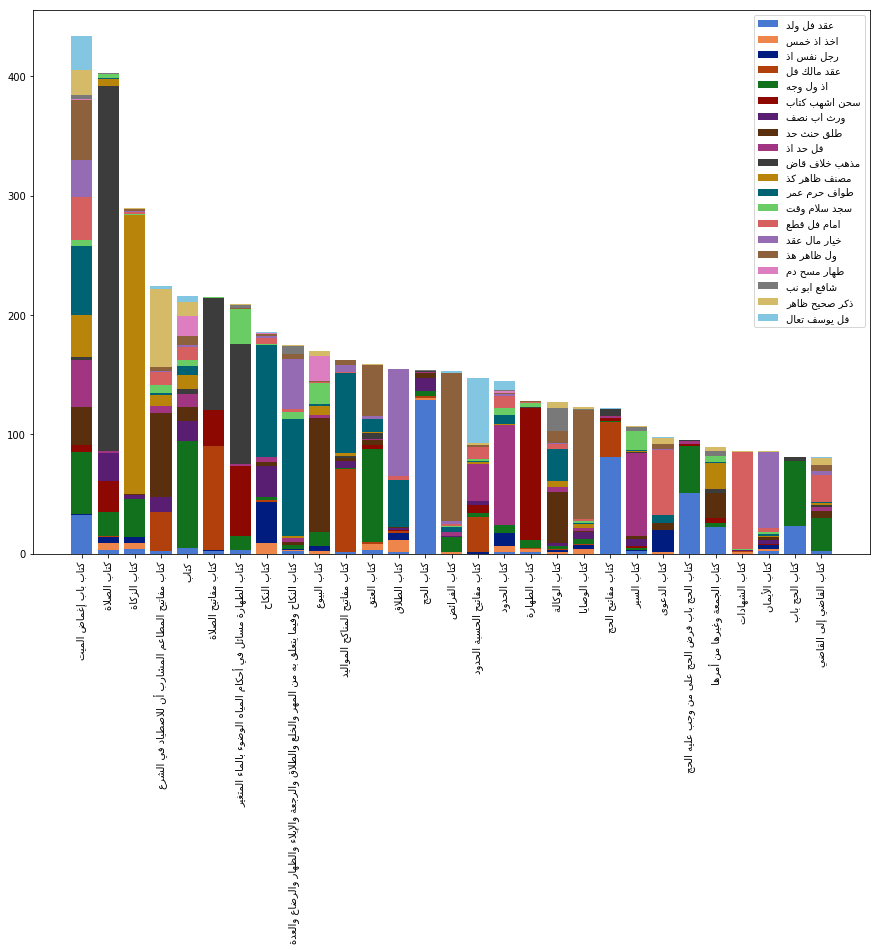

In [66]:
# The 30 most common volume names
voltitles = metadata_newind['Level1Title'].value_counts().head(30)[1:].index
for i,v in enumerate(voltitles):
    print(i,v)
meta_sub = metadata_newind[metadata_newind.Level1Title.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'Level1Title', reshape_col1=True, aggfunc=len)

0 باب
1 مسألة
2 باب السلم
3 باب الرجوع عن الشهادة
4 باب الصرف
5 باب حد القذف
6 باب ما
7 باب ما جاء في
8 باب البغاة
9 باب الاستيلاد
10 باب القسامة
11 بابفي
12 باب الاعتكاف
13 باب اللقطة
14 فصل في
15 باب الضمان شرط الضامن الرشد
16 باب حد الشرب
17 باب القسمة
18 باب التيمم
19 مسألة إذا
20 باب الحيض
21 باب الخيار والاعفاف ونكاح العبد وجد أحد زوجين
22 باب صلاة العيدين
23 باب المسح على الخفين
24 باب الرجعة
25 باب صلاة الجمعة
26 دعوى الغلط في القسمة
27 باب صدقة الفطر
28 باب ما تجب فيه الشفعة ومالا تجب


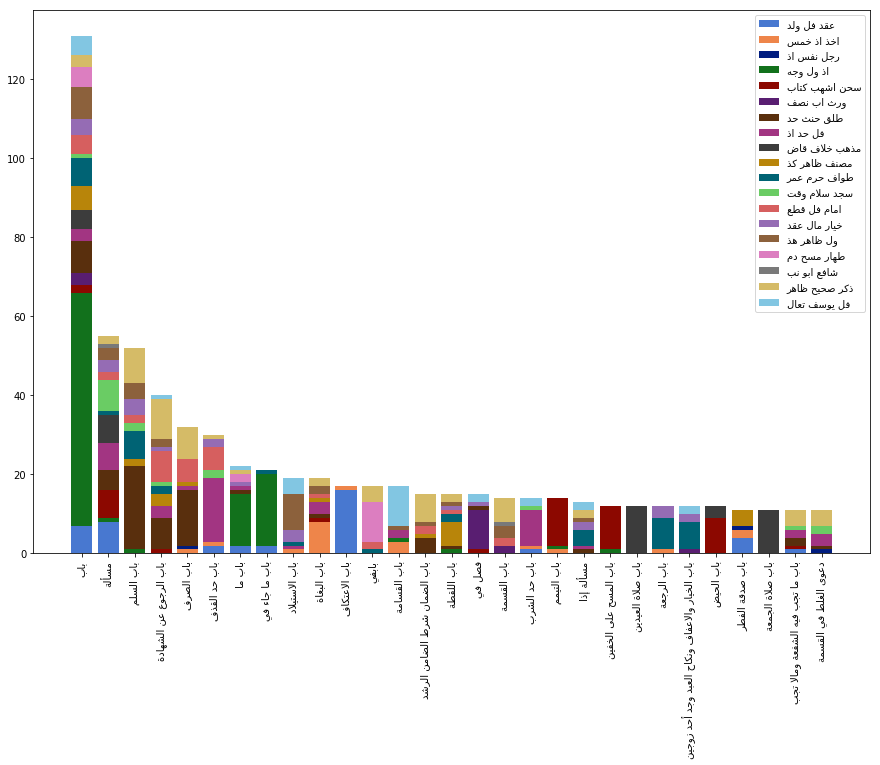

In [67]:
# The 30 most common chapter names
voltitles = metadata_newind['Level2Title'].value_counts().head(30)[1:].index
for i, v in enumerate(voltitles):
    print(i, v)
meta_sub = metadata_newind[metadata_newind.Level2Title.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'Level2Title', reshape_col1=True, aggfunc=len)